# Deep Hedging for a nonlinear generalized affine process - European capped call option.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import *
from matplotlib import rcParams

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 

We first write a function to generate paths of the SDE, that we have given in (3.1),
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

Write a function to determine the optimal hedge based on a deep learning approach

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^{\gamma} dW_t
$$

for the parameters specified in (5.11)

\begin{align}
a_0 &\in [0.2,1.0] \\
a_1 &\in [0.5,0.7] \\
b_0 &\in [-0.3,0.3] \\
b_1 &\in [-0.2,0.2] \\
\gamma &\in [0.2,1.8]
\end{align}

with payoff function \begin{align}
\Phi(X_T) & =(X_T-K)^+ - (X_T-(K+C))^+ \\
& = (X_T-12)^+ - (X_T-13)^+
\end{align}

# Training of a hedging strategy with uncertain Parameters

In [3]:
T = 21 / 365
n = 21
a_0 = [0.2,1.0]
a_1 = [0.5,0.7]
b_0 = [-0.3,0.3]
b_1 = [-0.2,0.2]
gamma = [0.5,1.5]
x_0 = 15.
def derivative(path):
    return tf.nn.relu(path[-1]-(x_0-3))-tf.nn.relu(path[-1]-(x_0-2))

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 1000,l_r = 0.0075,BATCH_SIZE =256)

  1%|          | 11/1000 [00:24<38:02,  2.31s/it]

Iteration:10, Price of Hedge: 0.7358500361442566, Loss: 0.3243787884712219


  2%|▏         | 21/1000 [00:46<33:22,  2.05s/it]

Iteration:20, Price of Hedge: 0.7491926550865173, Loss: 0.17330065369606018


  3%|▎         | 31/1000 [01:08<36:03,  2.23s/it]

Iteration:30, Price of Hedge: 0.7560856342315674, Loss: 0.09945224225521088


  4%|▍         | 41/1000 [01:30<37:04,  2.32s/it]

Iteration:40, Price of Hedge: 0.7578043937683105, Loss: 0.09568402916193008


  5%|▌         | 51/1000 [01:52<32:54,  2.08s/it]

Iteration:50, Price of Hedge: 0.7685014605522156, Loss: 0.08784911036491394


  6%|▌         | 61/1000 [02:13<34:16,  2.19s/it]

Iteration:60, Price of Hedge: 0.7714478969573975, Loss: 0.08963503688573837


  7%|▋         | 71/1000 [02:35<34:25,  2.22s/it]

Iteration:70, Price of Hedge: 0.7631177306175232, Loss: 0.07539784908294678


  8%|▊         | 81/1000 [02:57<31:58,  2.09s/it]

Iteration:80, Price of Hedge: 0.7476888298988342, Loss: 0.07629053294658661


  9%|▉         | 91/1000 [03:19<34:20,  2.27s/it]

Iteration:90, Price of Hedge: 0.7534456253051758, Loss: 0.06698480248451233


 10%|█         | 101/1000 [03:41<31:31,  2.10s/it]

Iteration:100, Price of Hedge: 0.7554448246955872, Loss: 0.06280447542667389


 11%|█         | 111/1000 [04:03<32:44,  2.21s/it]

Iteration:110, Price of Hedge: 0.7643232345581055, Loss: 0.05689961463212967


 12%|█▏        | 121/1000 [04:25<33:32,  2.29s/it]

Iteration:120, Price of Hedge: 0.7612810134887695, Loss: 0.05579826980829239


 13%|█▎        | 131/1000 [04:46<28:31,  1.97s/it]

Iteration:130, Price of Hedge: 0.7601666450500488, Loss: 0.0680197924375534


 14%|█▍        | 141/1000 [05:09<32:24,  2.26s/it]

Iteration:140, Price of Hedge: 0.7559611797332764, Loss: 0.054193973541259766


 15%|█▌        | 151/1000 [05:31<32:05,  2.27s/it]

Iteration:150, Price of Hedge: 0.7619547843933105, Loss: 0.05066559836268425


 16%|█▌        | 161/1000 [05:52<29:36,  2.12s/it]

Iteration:160, Price of Hedge: 0.7625347971916199, Loss: 0.0657462328672409


 17%|█▋        | 171/1000 [06:14<31:22,  2.27s/it]

Iteration:170, Price of Hedge: 0.7615929245948792, Loss: 0.057414423674345016


 18%|█▊        | 181/1000 [06:36<28:57,  2.12s/it]

Iteration:180, Price of Hedge: 0.7608179450035095, Loss: 0.054911233484745026


 19%|█▉        | 191/1000 [06:59<30:41,  2.28s/it]

Iteration:190, Price of Hedge: 0.7594664096832275, Loss: 0.08180452138185501


 20%|██        | 201/1000 [07:21<31:37,  2.37s/it]

Iteration:200, Price of Hedge: 0.761333703994751, Loss: 0.061290591955184937


 21%|██        | 211/1000 [07:42<26:38,  2.03s/it]

Iteration:210, Price of Hedge: 0.757174015045166, Loss: 0.05730422958731651


 22%|██▏       | 221/1000 [08:05<28:57,  2.23s/it]

Iteration:220, Price of Hedge: 0.7580077052116394, Loss: 0.04884742200374603


 23%|██▎       | 231/1000 [08:27<29:32,  2.30s/it]

Iteration:230, Price of Hedge: 0.7643222808837891, Loss: 0.06604678928852081


 24%|██▍       | 241/1000 [08:48<26:59,  2.13s/it]

Iteration:240, Price of Hedge: 0.7620634436607361, Loss: 0.045619238168001175


 25%|██▌       | 251/1000 [09:11<28:12,  2.26s/it]

Iteration:250, Price of Hedge: 0.7580652832984924, Loss: 0.05898869410157204


 26%|██▌       | 261/1000 [09:33<25:58,  2.11s/it]

Iteration:260, Price of Hedge: 0.7653943300247192, Loss: 0.043205466121435165


 27%|██▋       | 271/1000 [09:56<30:00,  2.47s/it]

Iteration:270, Price of Hedge: 0.769688069820404, Loss: 0.05388158559799194


 28%|██▊       | 281/1000 [10:19<27:48,  2.32s/it]

Iteration:280, Price of Hedge: 0.7594188451766968, Loss: 0.044507887214422226


 29%|██▉       | 291/1000 [10:41<26:02,  2.20s/it]

Iteration:290, Price of Hedge: 0.7693015933036804, Loss: 1.1134839057922363


 30%|███       | 301/1000 [11:03<26:32,  2.28s/it]

Iteration:300, Price of Hedge: 0.767538845539093, Loss: 0.07598184049129486


 31%|███       | 311/1000 [11:25<23:53,  2.08s/it]

Iteration:310, Price of Hedge: 0.7586818337440491, Loss: 0.06616447120904922


 32%|███▏      | 321/1000 [11:47<24:55,  2.20s/it]

Iteration:320, Price of Hedge: 0.7581231594085693, Loss: 0.062267325818538666


 33%|███▎      | 331/1000 [12:10<25:47,  2.31s/it]

Iteration:330, Price of Hedge: 0.7637216448783875, Loss: 0.0499158576130867


 34%|███▍      | 341/1000 [12:31<23:00,  2.09s/it]

Iteration:340, Price of Hedge: 0.7662547826766968, Loss: 0.045047275722026825


 35%|███▌      | 351/1000 [12:53<24:23,  2.25s/it]

Iteration:350, Price of Hedge: 0.7557376623153687, Loss: 0.059636928141117096


 36%|███▌      | 361/1000 [13:16<23:49,  2.24s/it]

Iteration:360, Price of Hedge: 0.7548868656158447, Loss: 0.06370130181312561


 37%|███▋      | 371/1000 [13:37<22:15,  2.12s/it]

Iteration:370, Price of Hedge: 0.7680245041847229, Loss: 0.052801042795181274


 38%|███▊      | 381/1000 [14:00<23:37,  2.29s/it]

Iteration:380, Price of Hedge: 0.7604192495346069, Loss: 0.056819867342710495


 39%|███▉      | 391/1000 [14:21<21:05,  2.08s/it]

Iteration:390, Price of Hedge: 0.7584522366523743, Loss: 0.047869667410850525


 40%|████      | 401/1000 [14:43<21:57,  2.20s/it]

Iteration:400, Price of Hedge: 0.7529317140579224, Loss: 0.05276878923177719


 41%|████      | 411/1000 [15:06<23:16,  2.37s/it]

Iteration:410, Price of Hedge: 0.7537754774093628, Loss: 0.05867515131831169


 42%|████▏     | 421/1000 [15:27<20:16,  2.10s/it]

Iteration:420, Price of Hedge: 0.7615621089935303, Loss: 0.04495672881603241


 43%|████▎     | 431/1000 [15:50<21:25,  2.26s/it]

Iteration:430, Price of Hedge: 0.7709380388259888, Loss: 0.05438455939292908


 44%|████▍     | 441/1000 [16:12<20:06,  2.16s/it]

Iteration:440, Price of Hedge: 0.7533531785011292, Loss: 0.05142088979482651


 45%|████▌     | 451/1000 [16:34<20:20,  2.22s/it]

Iteration:450, Price of Hedge: 0.7461827397346497, Loss: 0.06524060666561127


 46%|████▌     | 461/1000 [16:57<21:00,  2.34s/it]

Iteration:460, Price of Hedge: 0.7602898478507996, Loss: 0.06662745773792267


 47%|████▋     | 471/1000 [17:18<18:16,  2.07s/it]

Iteration:470, Price of Hedge: 0.7600679397583008, Loss: 0.05190998315811157


 48%|████▊     | 481/1000 [17:40<19:30,  2.25s/it]

Iteration:480, Price of Hedge: 0.7595037817955017, Loss: 0.05529678612947464


 49%|████▉     | 491/1000 [18:03<19:24,  2.29s/it]

Iteration:490, Price of Hedge: 0.740624189376831, Loss: 0.050499990582466125


 50%|█████     | 501/1000 [18:24<17:55,  2.15s/it]

Iteration:500, Price of Hedge: 0.7629602551460266, Loss: 0.0611504390835762


 51%|█████     | 511/1000 [18:48<19:26,  2.38s/it]

Iteration:510, Price of Hedge: 0.7701048851013184, Loss: 0.05406097322702408


 52%|█████▏    | 521/1000 [19:09<16:10,  2.03s/it]

Iteration:520, Price of Hedge: 0.7594922184944153, Loss: 0.04675386846065521


 53%|█████▎    | 531/1000 [19:31<17:34,  2.25s/it]

Iteration:530, Price of Hedge: 0.7677865028381348, Loss: 0.0424262210726738


 54%|█████▍    | 541/1000 [19:54<17:52,  2.34s/it]

Iteration:540, Price of Hedge: 0.764981746673584, Loss: 0.05246417224407196


 55%|█████▌    | 551/1000 [20:15<15:20,  2.05s/it]

Iteration:550, Price of Hedge: 0.7572488188743591, Loss: 0.04984956979751587


 56%|█████▌    | 561/1000 [20:37<16:41,  2.28s/it]

Iteration:560, Price of Hedge: 0.7663877010345459, Loss: 0.04889377951622009


 57%|█████▋    | 571/1000 [21:00<15:58,  2.23s/it]

Iteration:570, Price of Hedge: 0.756910502910614, Loss: 0.04435507580637932


 58%|█████▊    | 581/1000 [21:20<13:46,  1.97s/it]

Iteration:580, Price of Hedge: 0.765468180179596, Loss: 0.05731293186545372


 59%|█████▉    | 591/1000 [21:43<16:41,  2.45s/it]

Iteration:590, Price of Hedge: 0.753506600856781, Loss: 0.04261988401412964


 60%|██████    | 601/1000 [22:04<13:13,  1.99s/it]

Iteration:600, Price of Hedge: 0.7562152743339539, Loss: 0.05327347666025162


 61%|██████    | 611/1000 [22:25<12:55,  1.99s/it]

Iteration:610, Price of Hedge: 0.763139009475708, Loss: 0.04825802519917488


 62%|██████▏   | 621/1000 [22:46<13:31,  2.14s/it]

Iteration:620, Price of Hedge: 0.7532306909561157, Loss: 0.04857249557971954


 63%|██████▎   | 631/1000 [23:06<13:14,  2.15s/it]

Iteration:630, Price of Hedge: 0.7570505142211914, Loss: 0.04125206172466278


 64%|██████▍   | 641/1000 [23:34<17:48,  2.98s/it]

Iteration:640, Price of Hedge: 0.7649378776550293, Loss: 0.04343891516327858


 65%|██████▌   | 651/1000 [23:56<12:12,  2.10s/it]

Iteration:650, Price of Hedge: 0.7678229212760925, Loss: 0.036040786653757095


 66%|██████▌   | 661/1000 [24:16<11:22,  2.01s/it]

Iteration:660, Price of Hedge: 0.7612437009811401, Loss: 0.05021250247955322


 67%|██████▋   | 671/1000 [24:38<11:41,  2.13s/it]

Iteration:670, Price of Hedge: 0.7630509734153748, Loss: 0.05178011581301689


 68%|██████▊   | 681/1000 [24:59<11:41,  2.20s/it]

Iteration:680, Price of Hedge: 0.7622865438461304, Loss: 0.03704748675227165


 69%|██████▉   | 691/1000 [25:21<10:52,  2.11s/it]

Iteration:690, Price of Hedge: 0.7559609413146973, Loss: 0.042965907603502274


 70%|███████   | 701/1000 [25:43<11:20,  2.28s/it]

Iteration:700, Price of Hedge: 0.7623522281646729, Loss: 0.047281574457883835


 71%|███████   | 711/1000 [26:05<09:53,  2.05s/it]

Iteration:710, Price of Hedge: 0.7595228552818298, Loss: 0.04057327285408974


 72%|███████▏  | 721/1000 [26:28<10:40,  2.29s/it]

Iteration:720, Price of Hedge: 0.757256805896759, Loss: 0.03588390350341797


 73%|███████▎  | 731/1000 [26:50<10:24,  2.32s/it]

Iteration:730, Price of Hedge: 0.7657603621482849, Loss: 0.04304640367627144


 74%|███████▍  | 741/1000 [27:12<09:22,  2.17s/it]

Iteration:740, Price of Hedge: 0.76904296875, Loss: 0.038215506821870804


 75%|███████▌  | 751/1000 [27:34<09:25,  2.27s/it]

Iteration:750, Price of Hedge: 0.7531154155731201, Loss: 0.04137691110372543


 76%|███████▌  | 761/1000 [27:56<08:44,  2.19s/it]

Iteration:760, Price of Hedge: 0.7608993649482727, Loss: 0.03662003204226494


 77%|███████▋  | 771/1000 [28:18<08:15,  2.16s/it]

Iteration:770, Price of Hedge: 0.7686911821365356, Loss: 0.03872191160917282


 78%|███████▊  | 781/1000 [28:40<08:22,  2.30s/it]

Iteration:780, Price of Hedge: 0.759651243686676, Loss: 0.052680112421512604


 79%|███████▉  | 791/1000 [29:02<07:09,  2.05s/it]

Iteration:790, Price of Hedge: 0.7530552744865417, Loss: 0.043068766593933105


 80%|████████  | 801/1000 [29:25<07:50,  2.36s/it]

Iteration:800, Price of Hedge: 0.7657535672187805, Loss: 0.036975350230932236


 81%|████████  | 811/1000 [29:48<06:59,  2.22s/it]

Iteration:810, Price of Hedge: 0.7661688327789307, Loss: 0.03124699369072914


 82%|████████▏ | 821/1000 [30:09<06:28,  2.17s/it]

Iteration:820, Price of Hedge: 0.751512885093689, Loss: 0.04081106185913086


 83%|████████▎ | 831/1000 [30:32<06:28,  2.30s/it]

Iteration:830, Price of Hedge: 0.7705853581428528, Loss: 0.0418892540037632


 84%|████████▍ | 841/1000 [30:53<05:27,  2.06s/it]

Iteration:840, Price of Hedge: 0.765587568283081, Loss: 0.046397864818573


 85%|████████▌ | 851/1000 [31:16<05:28,  2.20s/it]

Iteration:850, Price of Hedge: 0.766385018825531, Loss: 0.040040839463472366


 86%|████████▌ | 861/1000 [31:40<05:51,  2.53s/it]

Iteration:860, Price of Hedge: 0.7651597261428833, Loss: 0.03561042994260788


 87%|████████▋ | 871/1000 [32:01<04:29,  2.09s/it]

Iteration:870, Price of Hedge: 0.7573785185813904, Loss: 0.041607700288295746


 88%|████████▊ | 881/1000 [32:24<04:36,  2.32s/it]

Iteration:880, Price of Hedge: 0.7616907358169556, Loss: 0.03421715646982193


 89%|████████▉ | 891/1000 [32:47<04:10,  2.29s/it]

Iteration:890, Price of Hedge: 0.7640854120254517, Loss: 0.034726183861494064


 90%|█████████ | 901/1000 [33:11<03:47,  2.30s/it]

Iteration:900, Price of Hedge: 0.7604658007621765, Loss: 0.042309753596782684


 91%|█████████ | 911/1000 [33:33<03:08,  2.12s/it]

Iteration:910, Price of Hedge: 0.7660614848136902, Loss: 0.03229775279760361


 92%|█████████▏| 921/1000 [33:56<03:01,  2.29s/it]

Iteration:920, Price of Hedge: 0.7543154358863831, Loss: 0.03233371675014496


 93%|█████████▎| 931/1000 [34:18<02:41,  2.34s/it]

Iteration:930, Price of Hedge: 0.7696698307991028, Loss: 0.03132525831460953


 94%|█████████▍| 941/1000 [34:40<02:05,  2.13s/it]

Iteration:940, Price of Hedge: 0.7584404945373535, Loss: 0.03838921710848808


 95%|█████████▌| 951/1000 [35:03<01:53,  2.32s/it]

Iteration:950, Price of Hedge: 0.7459898591041565, Loss: 0.035756226629018784


 96%|█████████▌| 961/1000 [35:24<01:24,  2.17s/it]

Iteration:960, Price of Hedge: 0.7607266902923584, Loss: 0.0332026369869709


 97%|█████████▋| 971/1000 [35:46<01:03,  2.18s/it]

Iteration:970, Price of Hedge: 0.7646381855010986, Loss: 0.03250369429588318


 98%|█████████▊| 981/1000 [36:09<00:45,  2.41s/it]

Iteration:980, Price of Hedge: 0.7580258250236511, Loss: 0.03296533599495888


 99%|█████████▉| 991/1000 [36:31<00:18,  2.04s/it]

Iteration:990, Price of Hedge: 0.754630446434021, Loss: 0.030269259586930275


100%|██████████| 1000/1000 [36:51<00:00,  2.21s/it]


We can now illustrate the computed hedging strategy in a graph

In [4]:
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

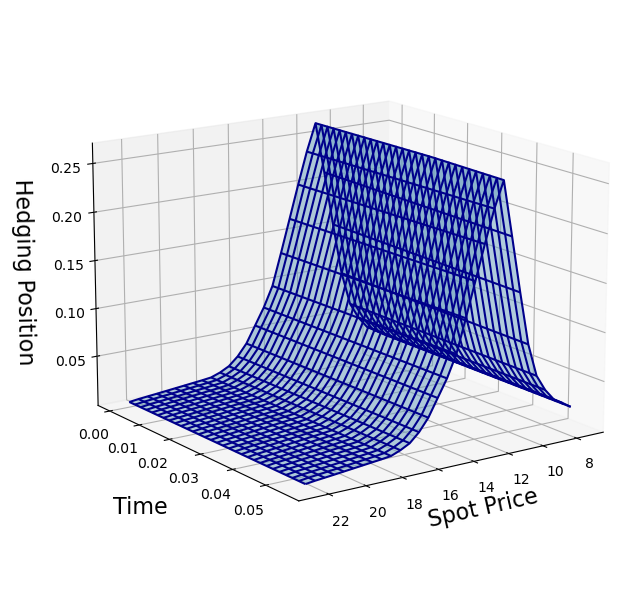

In [9]:
nr_discrete_points = 30 
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
grid = np.zeros((nr_discrete_points,nr_discrete_points))
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y , grid,color = "lightskyblue",alpha = 0.5)
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge")

ax.view_init(15, 55)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.tight_layout()

plt.show()

We now look at the Hedging Error of this strategy

In [10]:
BATCH_SIZE = 50000 
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

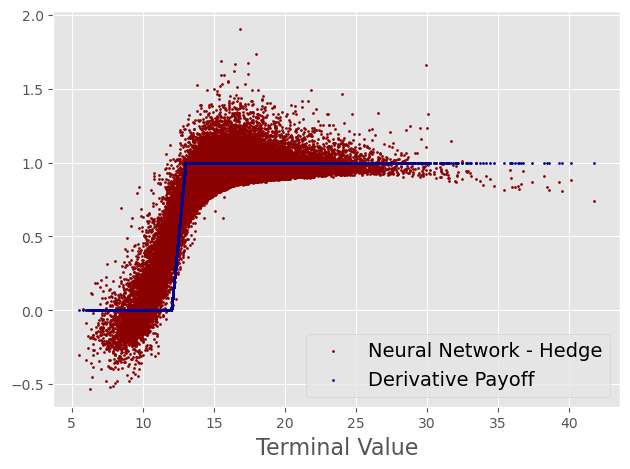

In [11]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


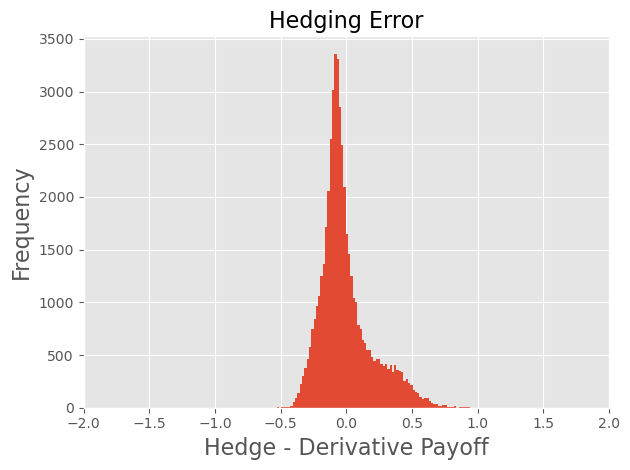

In [12]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.show()

## Training of a hedging strategy with fixed parameters that lie in the middle of each of the already specified parameter intervals

In [13]:
T = 21 / 365 
n = 21
a_0_fix = [0.6,0.6]
a_1_fix = [0.6,0.6]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 15.
def derivative(path):
    return tf.nn.relu(path[-1]-(x_0-3))-tf.nn.relu(path[-1]-(x_0-2))

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 1000,l_r = 0.0075,BATCH_SIZE =256)

  1%|          | 11/1000 [00:27<38:56,  2.36s/it]

Iteration:10, Price of Hedge: 0.9016430974006653, Loss: 0.1335451751947403


  2%|▏         | 21/1000 [00:56<49:59,  3.06s/it]

Iteration:20, Price of Hedge: 0.9008186459541321, Loss: 0.11497050523757935


  3%|▎         | 31/1000 [01:21<41:08,  2.55s/it]

Iteration:30, Price of Hedge: 0.8892015814781189, Loss: 0.13332286477088928


  4%|▍         | 41/1000 [01:45<39:32,  2.47s/it]

Iteration:40, Price of Hedge: 0.8778659105300903, Loss: 0.0895235612988472


  5%|▌         | 51/1000 [02:09<39:20,  2.49s/it]

Iteration:50, Price of Hedge: 0.8688172698020935, Loss: 0.0747424066066742


  6%|▌         | 61/1000 [02:34<37:31,  2.40s/it]

Iteration:60, Price of Hedge: 0.8612226247787476, Loss: 0.07876063883304596


  7%|▋         | 71/1000 [02:59<39:41,  2.56s/it]

Iteration:70, Price of Hedge: 0.8584427237510681, Loss: 0.07049545645713806


  8%|▊         | 81/1000 [03:25<37:08,  2.43s/it]

Iteration:80, Price of Hedge: 0.860366702079773, Loss: 0.06300625950098038


  9%|▉         | 91/1000 [03:50<38:49,  2.56s/it]

Iteration:90, Price of Hedge: 0.8658698201179504, Loss: 0.04864233732223511


 10%|█         | 101/1000 [04:14<36:38,  2.45s/it]

Iteration:100, Price of Hedge: 0.8675608038902283, Loss: 0.06185207515954971


 11%|█         | 111/1000 [04:40<38:45,  2.62s/it]

Iteration:110, Price of Hedge: 0.8657379746437073, Loss: 0.05496758222579956


 12%|█▏        | 121/1000 [05:04<35:54,  2.45s/it]

Iteration:120, Price of Hedge: 0.864642858505249, Loss: 0.05978973209857941


 13%|█▎        | 131/1000 [05:29<35:23,  2.44s/it]

Iteration:130, Price of Hedge: 0.8616912961006165, Loss: 0.0452476441860199


 14%|█▍        | 141/1000 [05:52<34:48,  2.43s/it]

Iteration:140, Price of Hedge: 0.863008975982666, Loss: 0.049737781286239624


 15%|█▌        | 151/1000 [06:17<34:44,  2.45s/it]

Iteration:150, Price of Hedge: 0.862878143787384, Loss: 0.053535617887973785


 16%|█▌        | 161/1000 [06:41<34:03,  2.44s/it]

Iteration:160, Price of Hedge: 0.865122377872467, Loss: 0.052169814705848694


 17%|█▋        | 171/1000 [07:06<33:03,  2.39s/it]

Iteration:170, Price of Hedge: 0.8666796088218689, Loss: 0.03838083893060684


 18%|█▊        | 181/1000 [07:31<34:40,  2.54s/it]

Iteration:180, Price of Hedge: 0.8673543930053711, Loss: 0.03816096857190132


 19%|█▉        | 191/1000 [07:55<31:04,  2.31s/it]

Iteration:190, Price of Hedge: 0.8666542172431946, Loss: 0.04766488075256348


 20%|██        | 201/1000 [08:21<34:28,  2.59s/it]

Iteration:200, Price of Hedge: 0.8658285737037659, Loss: 0.04712061583995819


 21%|██        | 211/1000 [08:45<31:28,  2.39s/it]

Iteration:210, Price of Hedge: 0.8627458810806274, Loss: 0.037725407630205154


 22%|██▏       | 221/1000 [09:10<31:32,  2.43s/it]

Iteration:220, Price of Hedge: 0.8601028919219971, Loss: 0.03919540345668793


 23%|██▎       | 231/1000 [09:33<30:51,  2.41s/it]

Iteration:230, Price of Hedge: 0.8592352271080017, Loss: 0.02646263688802719


 24%|██▍       | 241/1000 [09:59<33:51,  2.68s/it]

Iteration:240, Price of Hedge: 0.8603140115737915, Loss: 0.02490925043821335


 25%|██▌       | 251/1000 [10:24<32:52,  2.63s/it]

Iteration:250, Price of Hedge: 0.8653155565261841, Loss: 0.024763377383351326


 26%|██▌       | 261/1000 [10:49<31:03,  2.52s/it]

Iteration:260, Price of Hedge: 0.8637738823890686, Loss: 0.029087090864777565


 27%|██▋       | 271/1000 [11:14<29:28,  2.43s/it]

Iteration:270, Price of Hedge: 0.8609986305236816, Loss: 0.025141064077615738


 28%|██▊       | 281/1000 [11:39<28:55,  2.41s/it]

Iteration:280, Price of Hedge: 0.8628012537956238, Loss: 0.035171300172805786


 29%|██▉       | 291/1000 [12:05<31:15,  2.65s/it]

Iteration:290, Price of Hedge: 0.8652316927909851, Loss: 0.033623285591602325


 30%|███       | 301/1000 [12:27<24:25,  2.10s/it]

Iteration:300, Price of Hedge: 0.8654287457466125, Loss: 0.021138865500688553


 31%|███       | 311/1000 [12:50<26:23,  2.30s/it]

Iteration:310, Price of Hedge: 0.8631190061569214, Loss: 0.02885931171476841


 32%|███▏      | 321/1000 [13:13<27:04,  2.39s/it]

Iteration:320, Price of Hedge: 0.8607914447784424, Loss: 0.036172524094581604


 33%|███▎      | 331/1000 [13:35<24:53,  2.23s/it]

Iteration:330, Price of Hedge: 0.8579144477844238, Loss: 0.039940159767866135


 34%|███▍      | 341/1000 [13:59<29:36,  2.70s/it]

Iteration:340, Price of Hedge: 0.8580906391143799, Loss: 0.029744906350970268


 35%|███▌      | 351/1000 [14:25<27:50,  2.57s/it]

Iteration:350, Price of Hedge: 0.8608655333518982, Loss: 0.029527883976697922


 36%|███▌      | 361/1000 [14:49<25:13,  2.37s/it]

Iteration:360, Price of Hedge: 0.8623761534690857, Loss: 0.03172849491238594


 37%|███▋      | 371/1000 [15:10<22:16,  2.12s/it]

Iteration:370, Price of Hedge: 0.8693714141845703, Loss: 0.03585771471261978


 38%|███▊      | 381/1000 [15:39<24:53,  2.41s/it]

Iteration:380, Price of Hedge: 0.8723811507225037, Loss: 0.03117995336651802


 39%|███▉      | 391/1000 [16:01<21:45,  2.14s/it]

Iteration:390, Price of Hedge: 0.8654316663742065, Loss: 0.03018861822783947


 40%|████      | 401/1000 [16:23<22:04,  2.21s/it]

Iteration:400, Price of Hedge: 0.8584835529327393, Loss: 0.03494594991207123


 41%|████      | 411/1000 [16:45<20:44,  2.11s/it]

Iteration:410, Price of Hedge: 0.8633986115455627, Loss: 0.07962818443775177


 42%|████▏     | 421/1000 [17:05<19:58,  2.07s/it]

Iteration:420, Price of Hedge: 0.8660776615142822, Loss: 0.040578171610832214


 43%|████▎     | 431/1000 [17:26<20:19,  2.14s/it]

Iteration:430, Price of Hedge: 0.865696132183075, Loss: 0.030824696645140648


 44%|████▍     | 441/1000 [17:47<18:05,  1.94s/it]

Iteration:440, Price of Hedge: 0.8631085157394409, Loss: 0.03101620078086853


 45%|████▌     | 451/1000 [18:07<18:09,  1.98s/it]

Iteration:450, Price of Hedge: 0.8635922074317932, Loss: 0.03529960662126541


 46%|████▌     | 461/1000 [18:28<20:06,  2.24s/it]

Iteration:460, Price of Hedge: 0.863257884979248, Loss: 0.026238836348056793


 47%|████▋     | 471/1000 [18:56<21:50,  2.48s/it]

Iteration:470, Price of Hedge: 0.8582647442817688, Loss: 0.031782615929841995


 48%|████▊     | 481/1000 [19:17<18:45,  2.17s/it]

Iteration:480, Price of Hedge: 0.856662392616272, Loss: 0.041622988879680634


 49%|████▉     | 491/1000 [19:38<18:13,  2.15s/it]

Iteration:490, Price of Hedge: 0.8636077642440796, Loss: 0.033682771027088165


 50%|█████     | 501/1000 [19:59<17:56,  2.16s/it]

Iteration:500, Price of Hedge: 0.8733828663825989, Loss: 0.03558182716369629


 51%|█████     | 511/1000 [20:16<13:09,  1.62s/it]

Iteration:510, Price of Hedge: 0.866581380367279, Loss: 0.03186449408531189


 52%|█████▏    | 521/1000 [20:33<13:49,  1.73s/it]

Iteration:520, Price of Hedge: 0.8593258857727051, Loss: 0.035914964973926544


 53%|█████▎    | 531/1000 [20:49<12:30,  1.60s/it]

Iteration:530, Price of Hedge: 0.863249659538269, Loss: 0.03032769449055195


 54%|█████▍    | 541/1000 [21:05<12:58,  1.70s/it]

Iteration:540, Price of Hedge: 0.8664179444313049, Loss: 0.032382071018218994


 55%|█████▌    | 551/1000 [21:22<12:50,  1.72s/it]

Iteration:550, Price of Hedge: 0.8615167737007141, Loss: 0.026769844815135002


 56%|█████▌    | 561/1000 [21:38<12:16,  1.68s/it]

Iteration:560, Price of Hedge: 0.8600334525108337, Loss: 0.029523007571697235


 57%|█████▋    | 571/1000 [21:55<11:49,  1.65s/it]

Iteration:570, Price of Hedge: 0.8646594882011414, Loss: 0.03616272658109665


 58%|█████▊    | 581/1000 [22:11<12:24,  1.78s/it]

Iteration:580, Price of Hedge: 0.8635945916175842, Loss: 0.02742082253098488


 59%|█████▉    | 591/1000 [22:27<11:26,  1.68s/it]

Iteration:590, Price of Hedge: 0.8610355854034424, Loss: 0.0360761359333992


 60%|██████    | 601/1000 [22:44<11:51,  1.78s/it]

Iteration:600, Price of Hedge: 0.8627485036849976, Loss: 0.027161719277501106


 61%|██████    | 611/1000 [23:01<11:41,  1.80s/it]

Iteration:610, Price of Hedge: 0.8662773370742798, Loss: 0.025095537304878235


 62%|██████▏   | 621/1000 [23:17<10:10,  1.61s/it]

Iteration:620, Price of Hedge: 0.8663537502288818, Loss: 0.030322441831231117


 63%|██████▎   | 631/1000 [23:32<09:39,  1.57s/it]

Iteration:630, Price of Hedge: 0.8605319261550903, Loss: 0.03120942786335945


 64%|██████▍   | 641/1000 [23:48<09:25,  1.57s/it]

Iteration:640, Price of Hedge: 0.8612414002418518, Loss: 0.051162075251340866


 65%|██████▌   | 651/1000 [23:57<04:32,  1.28it/s]

Iteration:650, Price of Hedge: 0.8648298978805542, Loss: 0.06703155487775803


 66%|██████▌   | 661/1000 [24:05<04:28,  1.26it/s]

Iteration:660, Price of Hedge: 0.8592249155044556, Loss: 0.045167483389377594


 67%|██████▋   | 671/1000 [24:13<04:06,  1.33it/s]

Iteration:670, Price of Hedge: 0.8646113276481628, Loss: 0.035071536898612976


 68%|██████▊   | 681/1000 [24:20<03:46,  1.41it/s]

Iteration:680, Price of Hedge: 0.8735774755477905, Loss: 0.03403189778327942


 69%|██████▉   | 691/1000 [24:28<04:03,  1.27it/s]

Iteration:690, Price of Hedge: 0.8643658757209778, Loss: 0.026229841634631157


 70%|███████   | 701/1000 [24:34<03:26,  1.45it/s]

Iteration:700, Price of Hedge: 0.8663105368614197, Loss: 0.031916309148073196


 71%|███████   | 711/1000 [24:42<04:03,  1.19it/s]

Iteration:710, Price of Hedge: 0.8632717132568359, Loss: 0.02632112428545952


 72%|███████▏  | 721/1000 [24:50<03:26,  1.35it/s]

Iteration:720, Price of Hedge: 0.8607060313224792, Loss: 0.032240599393844604


 73%|███████▎  | 731/1000 [24:58<03:27,  1.29it/s]

Iteration:730, Price of Hedge: 0.8652620315551758, Loss: 0.03010249324142933


 74%|███████▍  | 741/1000 [25:05<03:19,  1.30it/s]

Iteration:740, Price of Hedge: 0.8658053874969482, Loss: 0.032447293400764465


 75%|███████▌  | 751/1000 [25:13<03:14,  1.28it/s]

Iteration:750, Price of Hedge: 0.8649005889892578, Loss: 0.026555528864264488


 76%|███████▌  | 761/1000 [25:21<02:55,  1.36it/s]

Iteration:760, Price of Hedge: 0.860443115234375, Loss: 0.02126460336148739


 77%|███████▋  | 771/1000 [25:29<03:41,  1.03it/s]

Iteration:770, Price of Hedge: 0.8632026314735413, Loss: 0.030511531978845596


 78%|███████▊  | 781/1000 [25:41<03:54,  1.07s/it]

Iteration:780, Price of Hedge: 0.8646548986434937, Loss: 0.020081721246242523


 79%|███████▉  | 791/1000 [25:48<02:42,  1.29it/s]

Iteration:790, Price of Hedge: 0.8639013767242432, Loss: 0.024104299023747444


 80%|████████  | 801/1000 [25:57<02:29,  1.33it/s]

Iteration:800, Price of Hedge: 0.8641031384468079, Loss: 0.020584436133503914


 81%|████████  | 811/1000 [26:04<02:14,  1.41it/s]

Iteration:810, Price of Hedge: 0.8644058108329773, Loss: 0.025116441771388054


 82%|████████▏ | 821/1000 [26:10<02:03,  1.44it/s]

Iteration:820, Price of Hedge: 0.863174319267273, Loss: 0.023372221738100052


 83%|████████▎ | 831/1000 [26:17<01:57,  1.43it/s]

Iteration:830, Price of Hedge: 0.8669335842132568, Loss: 0.02407362312078476


 84%|████████▍ | 841/1000 [26:26<02:25,  1.09it/s]

Iteration:840, Price of Hedge: 0.8662075400352478, Loss: 0.025793660432100296


 85%|████████▌ | 851/1000 [26:34<02:10,  1.14it/s]

Iteration:850, Price of Hedge: 0.8636351823806763, Loss: 0.034383624792099


 86%|████████▌ | 861/1000 [26:43<01:50,  1.26it/s]

Iteration:860, Price of Hedge: 0.8632795810699463, Loss: 0.02268921583890915


 87%|████████▋ | 871/1000 [26:51<01:47,  1.20it/s]

Iteration:870, Price of Hedge: 0.8648823499679565, Loss: 0.01713380217552185


 88%|████████▊ | 881/1000 [26:58<01:22,  1.44it/s]

Iteration:880, Price of Hedge: 0.8654771447181702, Loss: 0.024808092042803764


 89%|████████▉ | 891/1000 [27:05<01:19,  1.37it/s]

Iteration:890, Price of Hedge: 0.8591113686561584, Loss: 0.019892040640115738


 90%|█████████ | 901/1000 [27:12<01:10,  1.40it/s]

Iteration:900, Price of Hedge: 0.8571118116378784, Loss: 0.02490837499499321


 91%|█████████ | 911/1000 [27:19<01:03,  1.41it/s]

Iteration:910, Price of Hedge: 0.8612014055252075, Loss: 0.022257953882217407


 92%|█████████▏| 921/1000 [27:27<01:05,  1.20it/s]

Iteration:920, Price of Hedge: 0.8693510890007019, Loss: 0.023431023582816124


 93%|█████████▎| 931/1000 [27:35<00:52,  1.32it/s]

Iteration:930, Price of Hedge: 0.8639694452285767, Loss: 0.02261471375823021


 94%|█████████▍| 941/1000 [27:43<00:44,  1.34it/s]

Iteration:940, Price of Hedge: 0.8650016784667969, Loss: 0.01898585446178913


 95%|█████████▌| 951/1000 [27:50<00:34,  1.41it/s]

Iteration:950, Price of Hedge: 0.8641353845596313, Loss: 0.021281156688928604


 96%|█████████▌| 961/1000 [27:57<00:29,  1.32it/s]

Iteration:960, Price of Hedge: 0.8621598482131958, Loss: 0.016506262123584747


 97%|█████████▋| 971/1000 [28:05<00:24,  1.21it/s]

Iteration:970, Price of Hedge: 0.8593184351921082, Loss: 0.0176846943795681


 98%|█████████▊| 981/1000 [28:13<00:14,  1.33it/s]

Iteration:980, Price of Hedge: 0.8663373589515686, Loss: 0.019944969564676285


 99%|█████████▉| 991/1000 [28:20<00:06,  1.40it/s]

Iteration:990, Price of Hedge: 0.8651920557022095, Loss: 0.01971469819545746


100%|██████████| 1000/1000 [28:27<00:00,  1.71s/it]


We can now display the trained non-robust strategy in a graph of the same form.

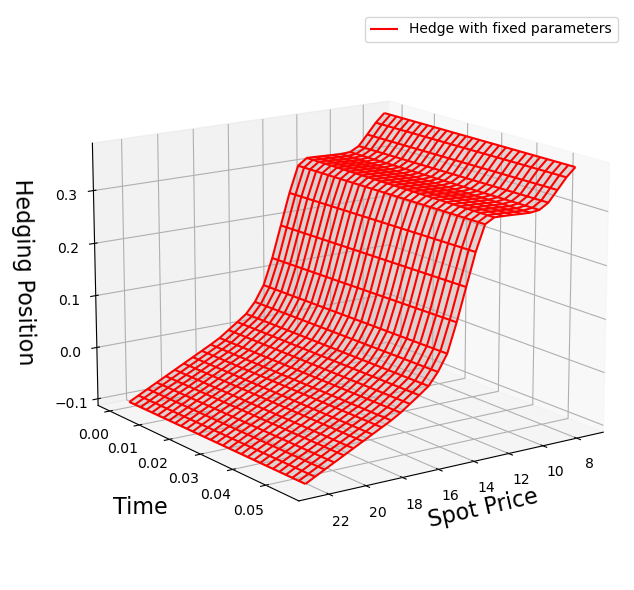

In [14]:
nr_discrete_points = 30
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y , grid_fix,color = "mistyrose",alpha = 0.5)
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(15, 55)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.show()

Compare the hedge strategies

In [15]:
style.use('ggplot')
BATCH_SIZE = 50000 
t_k = np.linspace(0,T,n+1)

path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

Compare how the hedge strategies perform.

C:\Users\User\AppData\Local\Temp\ipykernel_2620\2648608250.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


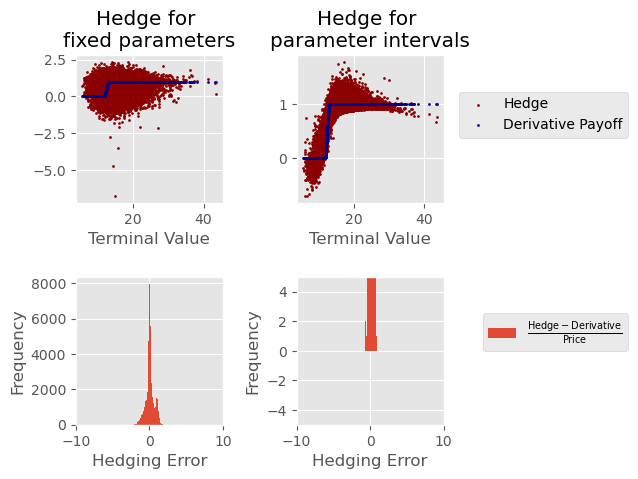

In [16]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))
axs[1,1].set_ylim([-5,5])

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = ((price_fix + delta_S_fix) - derivative_on_batch).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
axs[1,1].hist(hedging_error,100)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")
fig.show()

Adjusted Histogram: Difference between hedging errors

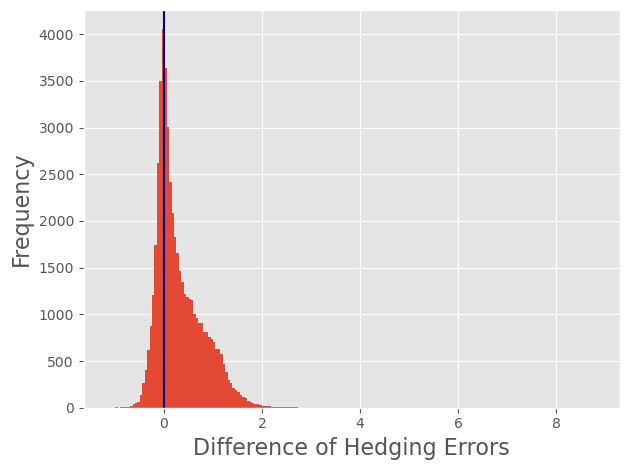

In [17]:
hedging_difference = np.abs(hedging_error_fix)/price_fix - np.abs(hedging_error)/price
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")

plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.tight_layout()
plt.show()

## Statistics on Hedging Errors

Hedging Error of the non-robust strategy.

In [18]:
print("Price of the fix hedge: {}".format(price_fix))
print("Price of the robust hedge: {}".format(price))

Price of the fix hedge: 0.8619939684867859
Price of the robust hedge: 0.7541996240615845


## Statistics on Absolute Hedging Errors

In [19]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,5.000000e+04
mean,4.381674e-01
std,4.243644e-01
min,5.960464e-07
25%,9.057093e-02
50%,2.737632e-01
75%,7.337590e-01
max,7.781934e+00


In [20]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.149991
std,0.130377
min,0.000003
25%,0.057786
50%,0.109995
75%,0.207052
max,1.086226


## Statistics on Relative Hedging Errors

In [21]:
pd.DataFrame(np.abs(hedging_error_fix)/price_fix).describe()

,0
count,5.000000e+04
mean,5.083185e-01
std,4.923068e-01
min,6.914740e-07
25%,1.050714e-01
50%,3.175929e-01
75%,8.512345e-01
max,9.027829e+00


In [22]:
pd.DataFrame(np.abs(hedging_error)/price).describe()

,0
count,50000.000000
mean,0.198875
std,0.172868
min,0.000003
25%,0.076619
50%,0.145844
75%,0.274532
max,1.440237
